## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

Trong bài này, nhóm sẽ dử dụng thuật toán hồi quy để dự đoán cân nặng dựa trên chiều dài của một bộ trong động vật, ví dụ cụ thể ở dưới là bộ "Passeriformes" (bộ sẻ). Trong cuộc sống hằng ngày, nhìn từ vẻ bề ngoài thì chúng ta rất dễ dàng biết một con vật dài bao nhiêu nhưng nếu không cầm lên thì không thể biết nó nặng bao nhiêu. Mô hình này sẽ giúp dự đoán được cân nặng từ chiều dài. Để dự đoán cân nặng từ chiều dài của tất cả động vật thì rất khó, tại vì mỗi động vật sẽ có những đặc điểm khác nhau, nhưng khi nó thuộc cùng một bộ, nó sẽ có rất nhiều đặc điểm giống nhau và có thể suy luận được sự liên quan này. 

## Đọc dữ liệu từ file
File dữ liệu của đồ án sau bước thu thập dữ liệu đang nằm tại địa chỉ '../thu_thap_du_lieu/animal_crawler/animal_info.csv'. Ta sẽ tiến hành đọc dữ liệu đã thu thập và lưu vào DataFrame `animal_df`

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)

/tmp/ipykernel_1012/2748818031.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)


In [3]:
#Lọc ra dữ liệu có bộ là Passeriformes
order = 'Passeriformes'
order_df = data_df[data_df['Order'] == order]


## Loại bỏ các giá trị nan

In [4]:
#Loại bỏ các giá trị nan
order_df = order_df.dropna(subset = ['Length', 'Weight'])

Ta sẽ xem các giá trị có trong 2 cột length và weight

In [5]:
order_df[['Length', 'Weight']].head(10)

,Length,Weight
19031,16.00,0.0320
19032,60.50,1.3500
19034,26.00,0.0850
19036,25.50,0.0765
19039,26.25,0.1025
19045,22.25,0.0493
19049,13.25,0.0190
19051,21.00,0.0795
19056,16.50,26.0000
19060,15.75,0.0205


Ta sẽ xem mối quan hệ giữa chiều dài và cân nặng :

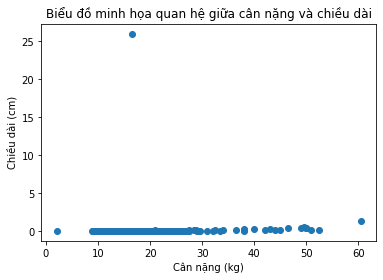

In [6]:
plt.scatter(x = order_df['Length'], y = order_df['Weight'])
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

## Loại bỏ các outlier

Như hình trên, dữ liệu vẫn còn 1 số outlier, trước hết ta cần loại bỏ những outlier này, ta sẽ sử dụng phương pháp IQR

In [7]:
def remove_outlier_iqr(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_iqr = q1 - iqr * 1.5
    upper_iqr = q3 + iqr * 1.5
    #remove outlier
    new_df = df[df[col] <= upper_iqr]
    new_df = new_df[new_df[col] >= lower_iqr]
    return new_df

order_df = remove_outlier_iqr(order_df, 'Weight')
order_df = remove_outlier_iqr(order_df, 'Length')

Xem lại kết quả sau khi loại bỏ outlier

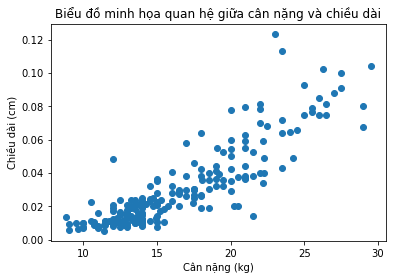

In [8]:
plt.scatter(x = order_df['Length'], y = order_df['Weight'])
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

##  Training model 

In [9]:
length = np.array(order_df['Length']).reshape(-1, 1)
weight = np.array(order_df['Weight'])
model = LinearRegression().fit(length, weight)

r2 = model.score(length, weight)

print('Hệ số xác định (coefficient of determination):', r2)

print('coefficient:', model.coef_)

print('intercept:', model.intercept_)



Hệ số xác định (coefficient of determination): 0.7627111910786906
coefficient: [0.00456255]
intercept: -0.04406135203955367


Giải thích: 
- Hệ số xác định r2 là mức độ phù hợp của mô hình, hệ số càng cao mô hình càng phù hợp.
- Coefficient và intercept lần lượt là 2 hệ số a và b trong đường thẳng hồi quy Y = aX + b

## Vẽ biểu đồ minh họa

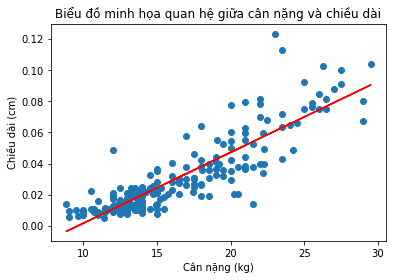

In [10]:
y_predict = model.predict(length)

plt.scatter(x = length, y = weight)
plt.plot(length, y_predict, 'r')
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

## Decision Tree Regressor Model

In [11]:
# data = length
# print(data)
# data = length.reshape(-1, 1)
# data = data.sort(key=lambda x: int(x[0]))

data = length
target = weight

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(max_depth=5).fit(data, target)
y_predict = tree.predict(data)
mse = mean_squared_error(target, y_predict)

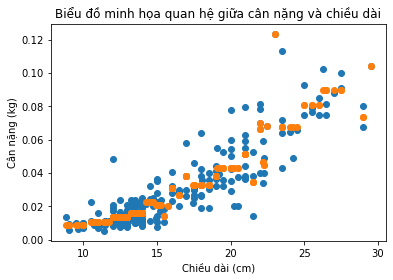

In [13]:
y_predict = tree.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [14]:
r2 = tree.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.8549723589366018


## Binned Regression Model

In [15]:
print(mse)

8.70303782058814e-05


In [16]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=15), LinearRegression(),
)
binned_regression.fit(data, target)
y_predict = binned_regression.predict(data)
mse = mean_squared_error(target, y_predict)

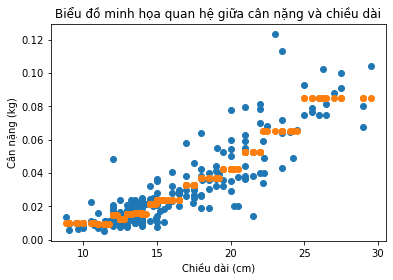

In [17]:
y_predict = binned_regression.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [18]:
r2 = binned_regression.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.7872268632588325


In [19]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
y_predict = polynomial_regression.predict(data)
mse = mean_squared_error(target, y_predict)

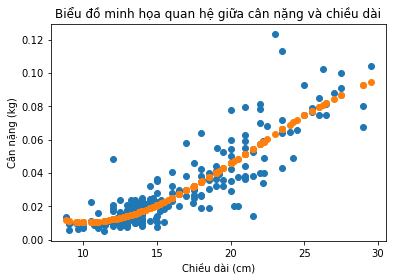

In [20]:
y_predict = polynomial_regression.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (cm)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [21]:
r2 = polynomial_regression.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.7863539418690033
